In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('books.csv', error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [5]:
df = df.drop(['isbn', 'isbn13'], axis=1)

In [7]:
df.drop(df[df['language_code'] != 'eng'].index, inplace=True)

### Now we have a data frame that only contians english books.
Here are a few points that I'm interested in:
- What is the highest rating book?
- What is the longest book?
- Which book has the most reviews?

In [9]:
# What is the highest rating book?
rating = df.sort_values('average_rating', ascending=False)

In [10]:
rating.drop(rating[rating['average_rating'] == 0.00].index, inplace=True)

In [11]:
rating.tail(2)

,bookID,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
11331,37877,Mandala Sand Art Kit,Walter Foster Creative Team,1.0,eng,8,1,0
3877,11854,Puzzle Pack: The Witch of Blackbird Pond,Mary B. Collins,1.0,eng,134,2,0


In [12]:
rating.drop(rating[rating['# num_pages'] < 50].index, inplace=True)

In [13]:
rating.drop(rating[rating['ratings_count'] < 100].index, inplace=True)

In [14]:
rating = rating.reset_index()
rating.head()

,index,bookID,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,7922,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456,31249,920
1,5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,eng,2690,38872,154
2,7924,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,eng,176,23336,294
3,7925,24815,The Indispensable Calvin and Hobbes,Bill Watterson,4.74,eng,255,15641,291
4,7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,27410,820


In [15]:
rating.drop(['index'], axis=1, inplace=True)

I want to graph highest average rating book with the most ratings count. 

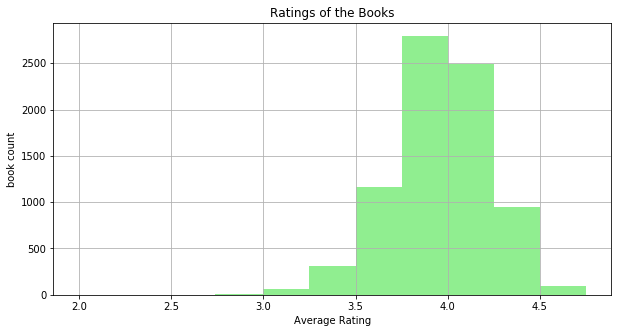

In [16]:
plt.figure(figsize=(10,5))
rating['average_rating'].hist(bins=[2,2.24,2.5,2.74,3,3.25,3.5,3.75,4,4.25,4.5,4.75], color='lightgreen')
plt.xlabel("Average Rating")
plt.ylabel("book count")
plt.title("Ratings of the Books")
plt.show()

### Relationship between rating and number of pages?
My guess is that there whould be positive correlation.

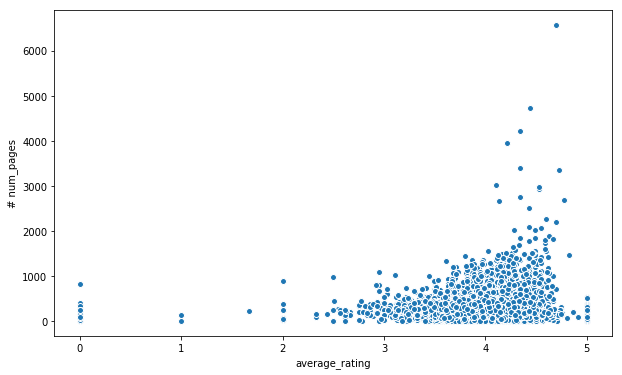

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_rating', y='# num_pages', data=df, linewidth=1)

Turns out, It is partially true that the longer books DO HAVE high average rating (over 4), but also short books have 
high average rating.

### Who is the greatest authors?
- Let's see how many books in 1000 best books belongs to which author.

In [34]:
top_rating = rating[:1001]

In [42]:
top_rating.head()

,bookID,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456,31249,920
1,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,eng,2690,38872,154
2,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,eng,176,23336,294
3,24815,The Indispensable Calvin and Hobbes,Bill Watterson,4.74,eng,255,15641,291
4,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,27410,820
5,6550,Early Color,Saul Leiter-Martin Harrison,4.73,eng,156,114,7
6,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,eng,176,14952,277
7,24820,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Bill Watterson,4.71,eng,96,3537,82
8,44826,The Price of the Ticket: Collected Nonfiction ...,James Baldwin,4.70,eng,712,396,28
9,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,eng,6576,1287,82


In [38]:
top_rating = top_rating.groupby('authors')

In [41]:
for author, book in top_rating:
    print(author)
    print(book)

Abolqasem Ferdowsi-Dick Davis-Azar Nafisi
    bookID                                 title  \
84   25869  Shahnameh: The Persian Book of Kings   

                                      authors  average_rating language_code  \
84  Abolqasem Ferdowsi-Dick Davis-Azar Nafisi            4.52           eng   

    # num_pages  ratings_count  text_reviews_count  
84          886            242                  19  
Abraham Lincoln-Don E. Fehrenbacher
     bookID                            title  \
392   20549  Speeches and Writings 1832–1858   

                                 authors  average_rating language_code  \
392  Abraham Lincoln-Don E. Fehrenbacher            4.37           eng   

     # num_pages  ratings_count  text_reviews_count  
392          898           1124                  18  
Adam Hochschild
     bookID            title          authors  average_rating language_code  \
866   27668  Bury the Chains  Adam Hochschild            4.27           eng   

     # num_pages  ratin

837            269                  21  
Chie Shinohara
     bookID                                title         authors  \
177   13764  Red River  Vol. 14 (Red River  #14)  Chie Shinohara   
182   13765  Red River  Vol. 15 (Red River  #15)  Chie Shinohara   
196   13767  Red River  Vol. 16 (Red River  #16)  Chie Shinohara   
214   13769  Red River  Vol. 17 (Red River  #17)  Chie Shinohara   

     average_rating language_code  # num_pages  ratings_count  \
177            4.45           eng          191            998   
182            4.45           eng          191            980   
196            4.44           eng          191            975   
214            4.43           eng          189            960   

     text_reviews_count  
177                  14  
182                  13  
196                  14  
214                  11  
Chimamanda Ngozi Adichie
     bookID                 title                   authors  average_rating  \
638   18749  Half of a Yellow Sun  Chimaman

896                 171  
Emil M. Cioran-Richard Howard
     bookID                     title                        authors  \
955    2855  A Short History of Decay  Emil M. Cioran-Richard Howard   

     average_rating language_code  # num_pages  ratings_count  \
955            4.26           eng          186           1653   

     text_reviews_count  
955                  89  
Emily Dickinson-R.W. Franklin
     bookID                         title                        authors  \
971   11619  The Poems of Emily Dickinson  Emily Dickinson-R.W. Franklin   

     average_rating language_code  # num_pages  ratings_count  \
971            4.25           eng          690            462   

     text_reviews_count  
971                  38  
Enid Blyton
     bookID                                             title      authors  \
705   17490  The Faraway Tree Stories (The Faraway Tree #1-3)  Enid Blyton   

     average_rating language_code  # num_pages  ratings_count  \
705            4

40           eng          134           1854                  34  
Hayao Miyazaki-Diana Wynne Jones
     bookID                                              title  \
289   34427  Howl's Moving Castle Picture Book (Howl's Movi...   
290   34426            Howl's Moving Castle Film Comic  Vol. 1   

                              authors  average_rating language_code  \
289  Hayao Miyazaki-Diana Wynne Jones             4.4           eng   
290  Hayao Miyazaki-Diana Wynne Jones             4.4           eng   

     # num_pages  ratings_count  text_reviews_count  
289          184           1614                  83  
290          176            818                  34  
Hayao Miyazaki-Matt Thorn-Kaori Inoue-Joe Yamazaki-Walden Wong-Izumi Evers
    bookID                                              title  \
29   23721  Nausicaä of the Valley of the Wind  Vol. 6 (Na...   
31   23722  Nausicaä of the Valley of the Wind  Vol. 5 (Na...   
32   23724  Nausicaä of the Valley of the Wind  Vol. 7 

952                  57  
John Piper-Justin Taylor-Mark Talbot-David A. Powlison-Steve Saint-Dustin Shramek-Carl Ellis
     bookID                                 title  \
591   45350  Suffering and the Sovereignty of God   

                                               authors  average_rating  \
591  John Piper-Justin Taylor-Mark Talbot-David A. ...            4.31   

    language_code  # num_pages  ratings_count  text_reviews_count  
591           eng          254            621                  43  
John Saul
     bookID                                              title    authors  \
101    6566  John Saul: Three Terrifying Bestselling Novels...  John Saul   

     average_rating language_code  # num_pages  ratings_count  \
101             4.5           eng          678            321   

     text_reviews_count  
101                   2  
John Steinbeck
     bookID         title         authors  average_rating language_code  \
390    4406  East of Eden  John Steinbeck          

     bookID                                              title  \
276   28385  In the Shadow of Young Girls in Flower (In Sea...   

                                               authors  average_rating  \
276  Marcel Proust-James Grieve-Christopher Prender...            4.41   

    language_code  # num_pages  ratings_count  text_reviews_count  
276           eng          576           5077                 232  
Marcel Proust-Mark Treharne-Christopher Prendergast
     bookID                                             title  \
592   18798  The Guermantes Way  (In Search of Lost Time  #3)   

                                               authors  average_rating  \
592  Marcel Proust-Mark Treharne-Christopher Prende...            4.31   

    language_code  # num_pages  ratings_count  text_reviews_count  
592           eng          619           4103                 237  
Margaret George
     bookID                                              title  \
997   10108  The Autobiography o

992           3802                 210  
Pauline Kael
     bookID                              title       authors  average_rating  \
144   41363  For Keeps: 30 Years at the Movies  Pauline Kael            4.47   

    language_code  # num_pages  ratings_count  text_reviews_count  
144           eng         1312            360                  15  
Peggy Parish-Lynn Sweat
     bookID                            title                  authors  \
723   14473  Merry Christmas  Amelia Bedelia  Peggy Parish-Lynn Sweat   
977   14479         Amelia Bedelia Helps Out  Peggy Parish-Lynn Sweat   

     average_rating language_code  # num_pages  ratings_count  \
723            4.29           eng           64           2452   
977            4.25           eng           64           7678   

     text_reviews_count  
723                  62  
977                  68  
Peggy Parish-Various
     bookID                                              title  \
259   14472  Amelia Bedelia 50th Anniversary

409          603         108208                7248  
Rudolph R. Windsor-El Hagahn
     bookID                                              title  \
589    9929  From Babylon to Timbuktu: A History of the Anc...   

                          authors  average_rating language_code  # num_pages  \
589  Rudolph R. Windsor-El Hagahn            4.31           eng          151   

     ratings_count  text_reviews_count  
589            359                  27  
Rumer Godden
     bookID                title       authors  average_rating language_code  \
863    3791  Thursday's Children  Rumer Godden            4.27           eng   

     # num_pages  ratings_count  text_reviews_count  
863          249            338                  23  
Rumer Godden-Gary Blythe
     bookID                           title                   authors  \
815    3797  Miss Happiness and Miss Flower  Rumer Godden-Gary Blythe   

     average_rating language_code  # num_pages  ratings_count  \
815            4.28   

William L. Shirer-Gordon A. Craig
     bookID                                              title  \
700   23756  Berlin Diary: The Journal of a Foreign Corresp...   

                               authors  average_rating language_code  \
700  William L. Shirer-Gordon A. Craig            4.29           eng   

     # num_pages  ratings_count  text_reviews_count  
700          627           3494                 191  
William Manchester
     bookID                                              title  \
143   19803  The Last Lion 2: Winston Spencer Churchill: Al...   
223   19809  The Last Lion: Winston Spencer Churchill: Visi...   
252   19807  The Glory and the Dream: A Narrative History o...   

                authors  average_rating language_code  # num_pages  \
143  William Manchester            4.47           eng          756   
223  William Manchester            4.43           eng          992   
252  William Manchester            4.42           eng         1397   

     ratings_co

In [48]:
authors = top_rating.count()

In [51]:
authors = authors.drop(['title', 'average_rating', 'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'], 
                       axis=1)

In [55]:
top_authors = authors[authors['bookID'] > 3]

In [56]:
top_authors.head(2)

,bookID
authors,
Agatha Christie,4
Bill Watterson,11


In [ ]:
top_authors['authors'] = top_authors.index

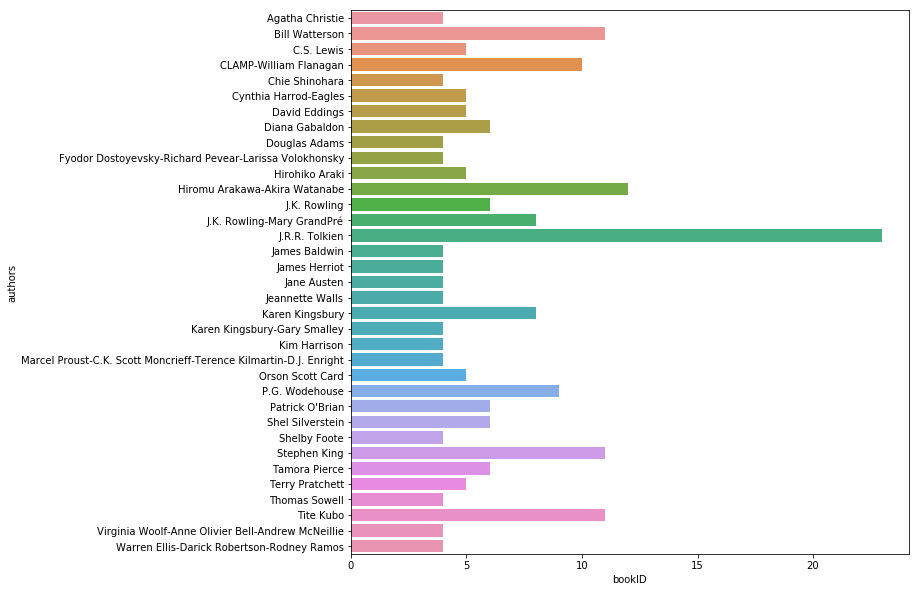

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(y='authors', x='bookID', data=top_authors)

J.R.R. Tolkien has the most book in top 1000 books in goodreads. He is the author of The Lords of Rings.
Great author!